# Digital Education - Learner Modeling Lecture

### BKT Simulation Notebook - Solution

In this notebook, we provide code for simulating inference in a Bayesian Knowledge Tracing (BKT) model and plot the predicted probability for the observations (po) as well as for the student state (st) at time.

In [10]:
# Load standard imports for the rest of the notebook.
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

We first write a function to calculate inference given the parameters of the BKT model as well as the observations of the student.

In [11]:
def simulate_bkt(p_0, p_s, p_g, p_l, p_f,o):
#p: BKT parameters
#o: observations o_0,...,o_T-1
#return: vector ps (ps_t = 1|o_0,...,o_t-1) for t=0,...,t=T
#return: vector po (po_t = 1|o_0,...,o_t-1) for t=0,...,t=T

    T = len(o)+1
    ps = np.zeros(T)
    po = np.zeros(T)

    #time step 0
    ps[0] = p_0
    po[0] = (1-p_s)*p_0 + p_g*(1-p_0)
    
    #time steps 1,...,T
    for t in range(1,T):
        
        #compute posterior at time step t-1
        if o[t-1] == 1:
            post = (1-p_s)*ps[t-1]/((1-p_s)*ps[t-1] + p_g*(1-ps[t-1]))
        else:
            post = p_s*ps[t-1]/(p_s*ps[t-1] + (1-p_g)*(1-ps[t-1]))
            
        #update state at t
        ps[t] = (1-p_f)*post + p_l*(1-post)
        
        #predict observation at t
        po[t] = (1-p_s)*ps[t] + p_g*(1-ps[t])

    #return predictions
    return ps, po



We also write a function for plotting the obtained curves.

In [14]:
def plot_bkt(po,ps):
#po: predicted probabilities for observation
#ps: predicted probabilities for state
    plt.plot(ps)
    plt.plot(po)
    plt.ylim(0, 1.0)
    plt.yticks(np.arange(0, 1.01, step=0.1))
    plt.xticks(np.arange(0, 12.01, step=1))
    plt.ylabel('Prediction')
    plt.xlabel('Time Step')
    plt.legend(['ps', 'po'])
    plt.show()

We then set initial parameters, compute the inference, and plot the results.

[0.6        0.6483871  0.65698076 0.37726607 0.32815872 0.57492224
 0.64355304 0.65616246 0.37704008 0.59257646 0.64698488 0.65674427
 0.65837565]
[0.62       0.65387097 0.65988653 0.46408625 0.4297111  0.60244557
 0.65048713 0.65931372 0.46392806 0.61480352 0.65288942 0.65972099
 0.66086295]


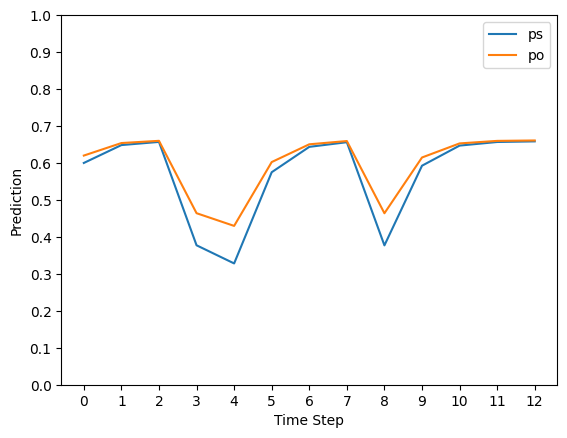

In [15]:
p_0 = 0.6
p_s = 0.1
p_g = 0.2
p_l = 0.3
p_f = 0.3
o = [1,1,0,0,1,1,1,0,1,1,1,1]
ps,po = simulate_bkt(p_0, p_s, p_g, p_l, p_f,o)
print(ps)
print(po)
plot_bkt(po,ps)

Next, we change the initital probability p_0.

[0.2        0.51176471 0.63003161 0.37020284 0.32737893 0.57461779
 0.64349262 0.65615218 0.37703725 0.59257551 0.6469847  0.65674424
 0.65837564]
[0.34       0.55823529 0.64102213 0.45914198 0.42916525 0.60223246
 0.65044484 0.65930652 0.46392607 0.61480286 0.65288929 0.65972097
 0.66086295]


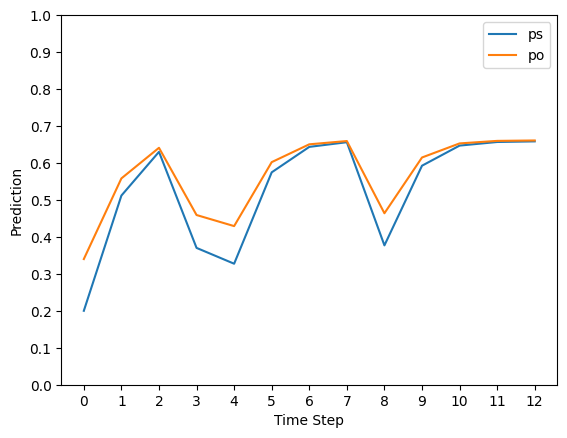

In [16]:
p_0 = 0.2
ps,po = simulate_bkt(p_0, p_s, p_g, p_l, p_f,o)
print(ps)
print(po)
plot_bkt(po,ps)

We observe that changing p_0 shifts both curves on the y-axis. The general trends of the curve remained the same, but initial probability in timestamp 0 decreased for both curves.

Finally, we put p_0 to its original value, but set p_f to 0.

[0.6        0.90967742 0.9848882  0.92346953 0.72093057 0.94455454
 0.99098645 0.99858799 0.99217015 0.99877456 0.99980919 0.99997031
 0.99999538]
[0.62       0.83677419 0.88942174 0.84642867 0.7046514  0.86118818
 0.89369051 0.8990116  0.89451911 0.89914219 0.89986644 0.89997922
 0.89999677]


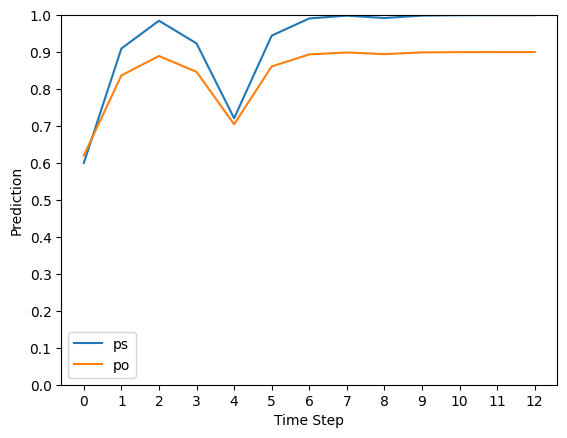

In [17]:
p_0 = 0.6
p_f = 0.0
ps,po = simulate_bkt(p_0, p_s, p_g, p_l, p_f,o)
print(ps)
print(po)
plot_bkt(po,ps)

We obsere that setting forget probability to 0, results in both curves increaseing. Moreover, the curves do not capture the significant drop at timestamp 8 as before, as the predicted probability at timestamp 8 is computed as: ps[t] = (1-p_f) * post + p_l*(1-post) and preceding observation was correct.